In [1]:
import cv2,os

data_path='D:/fer2013'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'Angry': 0, 'Happy': 1, 'Neutral': 2, 'Sad': 3, 'Surprise': 4}
['Angry', 'Happy', 'Neutral', 'Sad', 'Surprise']
[0, 1, 2, 3, 4]


In [2]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [3]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

Using TensorFlow backend.
C:\Users\nages\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nages\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nages\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nages\anaconda3\envs\tf-gpu\lib\sit

In [4]:
np.save('data',data)
np.save('target',new_target)

In [5]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(5,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [8]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=10,callbacks=[checkpoint],validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 17464 samples, validate on 4366 samples
Epoch 1/10
17464/17464 [==============================] - 28s 2ms/step - loss: 1.4690 - accuracy: 0.3661 - val_loss: 1.3689 - val_accuracy: 0.4297
Epoch 2/10
17464/17464 [==============================] - 25s 1ms/step - loss: 1.3414 - accuracy: 0.4429 - val_loss: 1.3025 - val_accuracy: 0.4485
Epoch 3/10
17464/17464 [==============================] - 25s 1ms/step - loss: 1.2675 - accuracy: 0.4787 - val_loss: 1.2728 - val_accuracy: 0.4723
Epoch 4/10
17464/17464 [==============================] - 25s 1ms/step - loss: 1.2139 - accuracy: 0.5023 - val_loss: 1.2132 - val_accuracy: 0.4956
Epoch 5/10
17464/17464 [==============================] - 25s 1ms/step - loss: 1.1661 - accuracy: 0.5278 - val_loss: 1.1752 - val_accuracy: 0.5188
Epoch 6/10
17464/17464 [==============================] - 25s 1ms/step - loss: 1.1274 - accuracy: 0.5433 - val_loss: 1.1710 - val_accuracy: 0.5183
Epoch 7/10
17464/1746

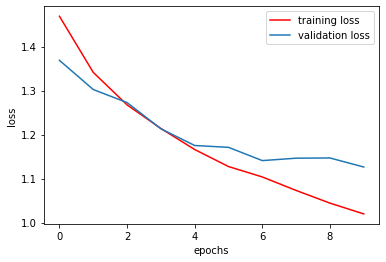

In [20]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [10]:
print(model.evaluate(test_data,test_target))

2426/2426 [==============================] - 1s 592us/step
[1.082400789461348, 0.564715564250946]


In [11]:
from keras.models import load_model
import cv2
import numpy as np

In [18]:
import datetime
model = load_model('D:/Baatuaugmentation/model-016.model')

face_clsfr=cv2.CascadeClassifier('D:/Baatuaugmentation/haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(0)
ret = source.set(4,240)

labels_dict={0:'Angry',1:'Happy',2:'Neutral',3:'Sad',4:'Surprise'}
color_dict={0:(0,255,0),1:(0,0,255),2:(0,245,255),3:(255,0,0),4:(233,200,0)}

In [19]:
while(True):

    ret,img=source.read()
    #img=np.full((100,80,3),12,np.uint8)
    #img = cv2.imread('D:/dataset/withmask', cv2.IMREAD_COLOR)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,2)  
    datet = str(datetime.datetime.now())
    font = cv2.FONT_HERSHEY_SIMPLEX
    frame = cv2.putText(img,datet,(10,50),font,1,(0,255,255),2,cv2.LINE_AA)

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',frame)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()